<a href="https://colab.research.google.com/github/smirnovaanastasia1234/MOMO_Task-2/blob/main/%D0%9C%D0%9E%D0%9C%D0%9E_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2_Cars_Moldova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическое задание №2_Часть 2.Cars_Moldova**



# **Import библиотек**

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from  sklearn.pipeline  import  make_pipeline 

для рисунков на черном фоне

In [254]:
plt.style.use('dark_background')

# Построение моделей на основе данных Cars Moldova

## **Загрузка данных на Google Drive**

In [255]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean (3).csv


## **Считываем файл в DataFrame**

метод .read_csv(path,delimiter) 

In [256]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [257]:
df.info()  # общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


Найдем категориальные и численные столбцы

In [258]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] 
 Число столблцов =  6


## **Линейная регрессия**

Разобъем данные на тренироваочные и тестовые

In [259]:
df_num = df[num_columns].copy()

df_num.info()

# x = все параметры кроме Price, y = Price

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values 

features_names = df_num.drop(columns = ['Price(euro)']).columns
# разбиваем на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  32220 non-null  int64  
 1   Distance              32220 non-null  float64
 2   Engine_capacity(cm3)  32220 non-null  float64
 3   Price(euro)           32220 non-null  float64
 4   Age                   32220 non-null  int64  
 5   km_year               32220 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.5 MB


,0,1,2,3,4
22549,0.40,0.011012,0.291667,0.60,0.005179
22550,0.74,0.208921,0.270833,0.26,0.297166
22551,0.84,0.155127,0.270833,0.16,0.343601
22552,0.84,0.219922,0.229167,0.16,0.487865
22553,0.94,0.049905,0.375000,0.06,0.248497


Создадим функцию потерь и функцию рассчета

In [260]:
def forward(weights, inputs):
    return inputs.dot(weights.T)

def loss_func(predicts, labels):
        return np.square(predicts - labels)  

Протестируем обе функции

In [261]:
weights = np.random.randn(X.shape[1])
print(weights)
yhat = forward(weights, X_train[0])
loss = np.sqrt(loss_func(yhat, y[0]))
print(yhat, y[0], loss)

[-0.1382643   0.1179332  -0.40649715  0.41921825  0.52498867]
0.12336506332998515 7750.0 7749.87663493667


In [262]:
def grad_loss(predicts, labels, inputs):
    return 2*(predicts - labels)*inputs/inputs.size

Проведем расчет градиента ошибки

In [263]:
weights = np.random.randn(X.shape[1])
yhat = forward(weights, X_train[0])
print(weights)
grad = grad_loss(yhat, y[0], X[0])
print(grad)

[ 1.00433542 -1.34946983  1.35690013  0.02833913  0.05987482]
[-6.23353007e+06 -6.04444736e+08 -5.57948987e+06 -3.40968825e+04
 -5.49495214e+07]


Определим функцию обновления весов

In [264]:
def update_weights(grad, weights, lerning_rate):
    return weights - lerning_rate*grad

Обновим весовые параметры


In [265]:
lerning_rate = 0.01
weights = update_weights(grad, weights, lerning_rate)
print(weights)

[6.23363050e+04 6.04444601e+06 5.57962556e+04 3.40997164e+02
 5.49495274e+05]


Проведем процедуру инициализации

In [266]:
def weights_init(weights, random_state=42):
    if np.ndim(weights)<1:
        weights = np.zeros(weights)
        
    np.random.seed(random_state)
    return np.random.randn(*weights.shape)/np.sqrt(weights.size)

In [267]:
weights = weights_init(X_train.shape[1], random_state=42)
weights

array([ 0.22213732, -0.06183368,  0.28965512,  0.68111966, -0.10471657])

Создадим процедуру обучения

In [268]:
def fit(X, y, weights, lr,  epochs=30):
    
    cost = np.zeros(epochs)
    for i in range(epochs): 
        
        grad = np.zeros(weights.shape);
        loss = 0;
        
        for m in range(X.shape[0]): 
            yhat  = forward(weights, X[m,:])
            grad += grad_loss(yhat,  y[m], X[m,:])
            loss += loss_func(yhat,  y[m])

        weights = update_weights(grad/X.shape[0],weights, lr)  
        cost[i] = loss/X.shape[0]
    
    return weights, cost

Протестируем обучение

In [269]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15, mfc='none' ); 
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция Потерь",fontsize=35)
    plt.xticks(FontSize = 25)

    plt.yticks(FontSize = 25);  

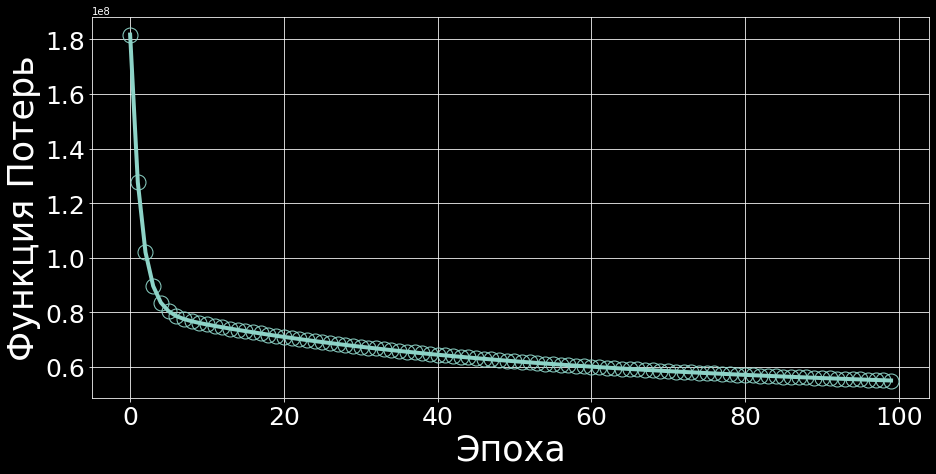

In [270]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit(X_train, y_train, weights, lr=0.9,  epochs=100)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost);

Проверим точность предсказания функцией, для этого мы можем воспользоваться метрикой R2

In [271]:
def predict(weights, inputs):
    yhat = np.zeros(inputs.shape[0])
    
    for m in range(inputs.shape[0]):
        yhat[m] = inputs[m,:].dot(weights.T)
    
    return yhat

посмотрим как выглядят наши ответы на фоне реальных

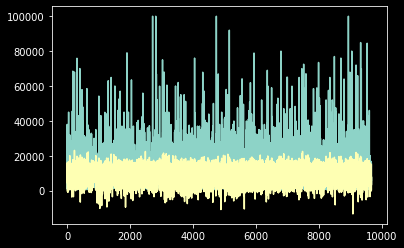

In [272]:
yhat = predict(weights, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

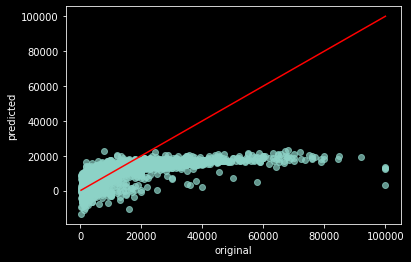

In [273]:
plt.scatter(y_test,yhat,alpha = 0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

Метрики оценки качества модели линейной регресии

MSE

In [274]:
def mean_square_error(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return np.mean(np.sum(np.square(labels-predicts)))
mean_square_error(weights, X_test, y_test)

499763579672.2438

MAE

In [275]:
def mean_absolute_error(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return np.mean(np.sum(np.abs(labels-predicts)))
mean_absolute_error(weights, X_test, y_test)

42304837.20470105

Коэффициент детерминации R2

In [276]:
def r2_score(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return 1-np.sum(np.square(labels-predicts))/np.sum(np.square(labels-np.mean(labels)))

In [277]:
r2_score(weights, X_test, y_test)

0.4057648574556436

Модель работает не очень хорошо, так как R2=0.41 (Чем меньше средняя квадратичная ошибка, тем R2 больше (ближе к единице), тем выше качество модели.)

In [278]:
BATCH = 5000

def fit_SGD(X, y, weights, lr,  epochs=30, batch_size = BATCH, random_state = 42):
    
    np.random.seed(random_state)
    
    
    cost = np.zeros(epochs)
    for i in range(epochs): 
        
        grad = np.zeros(weights.shape);
        loss = 0;
        
        idx_batch = np.random.randint(0,X.shape[0],batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        y_batch   = np.take(y, idx_batch)

        
        for m in range(batch_size): 
            yhat  = forward(weights, x_batch[m,:])
            grad += grad_loss(yhat,  y_batch[m], x_batch[m,:])
            loss += loss_func(yhat,  y_batch[m])

        weights  = update_weights(grad/batch_size,weights, lr)  
        cost[i] =loss/batch_size
    
    return weights, cost

0.38047499854221034


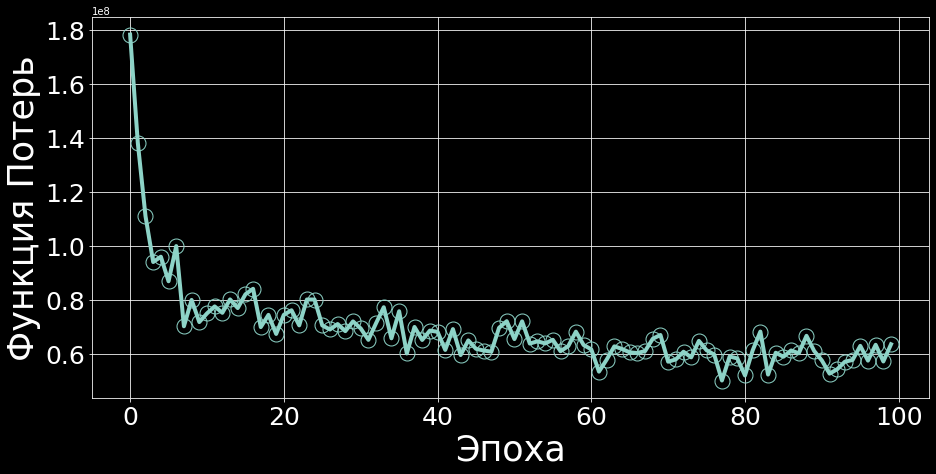

In [279]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit_SGD(X_train, y_train, weights, lr=0.7,  epochs=100)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost)

print(r2_score(weights, X_test, y_test))

Объеденим все функции в один класс

In [280]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)
        
        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            x_batch   = self.add_bias(X)
            y_batch   = y
        
        for i in range(self.epochs): 

            if self.batch_size: 
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
            self.weights = self.update()  
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]
     
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

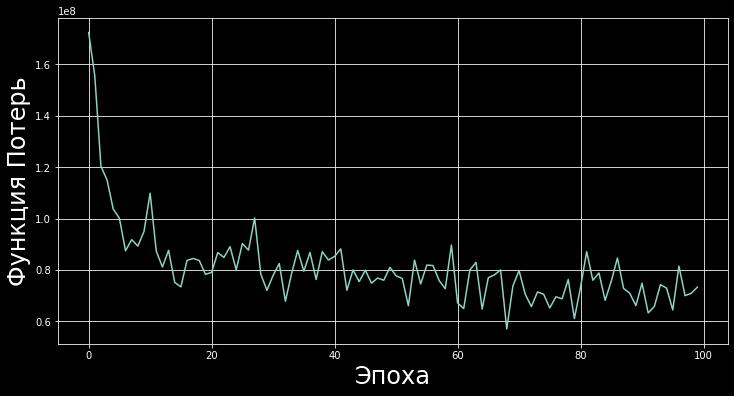

train R2: 0.2420; test R2: 0.2469


In [281]:
regr = LinearRegression(learning_rate=0.05,epochs=100,batch_size=3000)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

Посмотрим веса

In [286]:
def vis_weigths(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

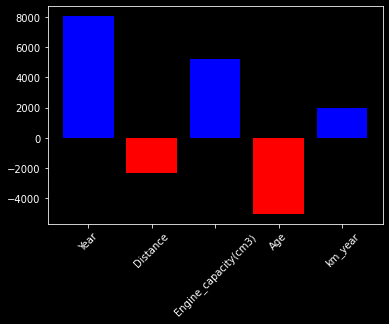

In [287]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [288]:
np.sum(np.abs(w))

22579.093908320814

# **Методы предварительной обработки данных**

## **Стандартизация**

### **Загрузка данных на Google Drive**

загружается файл после стандартизации из задания 1


In [306]:
uploaded = files.upload()

Saving cars_moldova_scaled.csv to cars_moldova_scaled (3).csv


### **Считываем файл в DataFrame**

метод .read_csv(path,delimiter) 

In [307]:
df = pd.read_csv('/content/cars_moldova_scaled.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_mean_by_Make,Рopularity categories,Рopularity categories_level,Percent_of_Price_mean_by_Make,Price_mean_by_Make_level
0,Toyota,Prius,0.376492,Hatchback,0.128983,-0.112516,Hybrid,Automatic,-0.179081,-0.376492,0.377953,9623.430749,9.568591,Популярный,25.942666,Средний уровень цен
1,Renault,Grand Scenic,0.793761,Universal,-0.490816,-0.604496,Diesel,Manual,-0.095044,-0.793761,0.261792,6675.596334,7.281192,Популярный,17.995949,Дешевый
2,Renault,Laguna,0.515582,Universal,-0.749065,-0.604496,Diesel,Manual,-0.305136,-0.515582,-0.538943,6675.596334,7.281192,Популярный,17.995949,Дешевый
3,Opel,Astra,-0.318957,Universal,0.180633,-0.440503,Metan/Propan,Manual,-0.562500,0.318957,-0.334500,4221.990680,5.661080,Популярный,11.381564,Дешевый
4,Mercedes,Vito,-1.153495,Microvan,1.213632,0.543457,Diesel,Manual,-0.626578,1.153495,-0.179619,13012.050083,9.357542,Популярный,35.077644,Средний уровень цен
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,1.071941,Sedan,-0.976325,-0.112516,Petrol,Automatic,0.214843,-1.071941,-0.039193,6877.247736,10.623836,Популярный,18.539557,Дешевый
32216,Land Rover,Freelander,-0.875316,Crossover,0.438883,-0.112516,Metan/Propan,Manual,-0.530986,0.875316,-0.504869,22799.666667,0.884544,Редкий,61.462919,Дорогой
32217,Dacia,Logan Mcv,0.932851,Universal,-0.965995,-0.604496,Diesel,Manual,-0.257866,-0.932851,-0.305294,5324.886161,4.171322,Повседневный,14.354730,Дешевый
32218,Mazda,6,-0.318957,Combi,1.936731,0.215470,Diesel,Manual,-0.573004,0.318957,1.113637,5190.179954,1.362508,Повседневный,13.991591,Дешевый


In [308]:
df.info()  # общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Make                           32220 non-null  object 
 1   Model                          32220 non-null  object 
 2   Year                           32220 non-null  float64
 3   Style                          32220 non-null  object 
 4   Distance                       32220 non-null  float64
 5   Engine_capacity(cm3)           32220 non-null  float64
 6   Fuel_type                      32220 non-null  object 
 7   Transmission                   32220 non-null  object 
 8   Price(euro)                    32220 non-null  float64
 9   Age                            32220 non-null  float64
 10  km_year                        32220 non-null  float64
 11  Price_mean_by_Make             32220 non-null  float64
 12  Рopularity categories          32220 non-null 

Найдем категориальные и численные столбцы

In [309]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'Рopularity categories_level', 'Price_mean_by_Make_level'] 
 Число столблцов =  7
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year', 'Price_mean_by_Make', 'Рopularity categories', 'Percent_of_Price_mean_by_Make'] 
 Число столблцов =  9


### **Линейная регрессия**

In [310]:
from sklearn.preprocessing import MinMaxScaler

In [311]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values # x = все параметры кроме Price, y = Price

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

pd.DataFrame(X_train).tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           32220 non-null  float64
 1   Distance                       32220 non-null  float64
 2   Engine_capacity(cm3)           32220 non-null  float64
 3   Price(euro)                    32220 non-null  float64
 4   Age                            32220 non-null  float64
 5   km_year                        32220 non-null  float64
 6   Price_mean_by_Make             32220 non-null  float64
 7   Рopularity categories          32220 non-null  float64
 8   Percent_of_Price_mean_by_Make  32220 non-null  float64
dtypes: float64(9)
memory usage: 2.2 MB


,0,1,2,3,4,5,6,7
22549,0.40,0.011012,0.291667,0.60,0.005179,0.148704,1.000000,0.148704
22550,0.74,0.208921,0.270833,0.26,0.297166,0.226069,0.899941,0.226069
22551,0.84,0.155127,0.270833,0.16,0.343601,0.104970,0.388170,0.104970
22552,0.84,0.219922,0.229167,0.16,0.487865,0.217499,0.255444,0.217499
22553,0.94,0.049905,0.375000,0.06,0.248497,0.203755,0.501766,0.203755


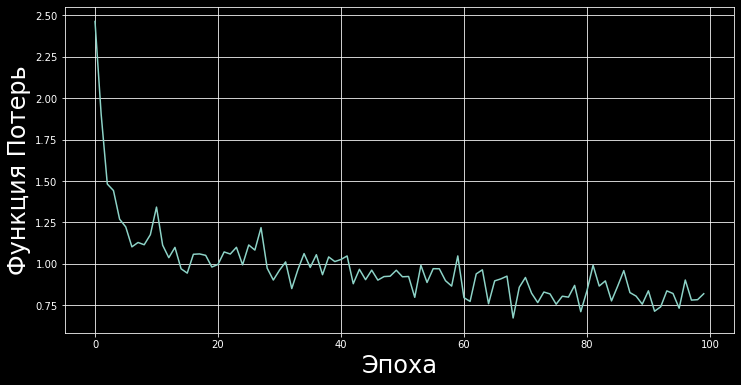

train R2: 0.2312; test R2: 0.2375


In [312]:
regr = LinearRegression(learning_rate=0.05,epochs=100,batch_size=3000)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

посмотрим веса

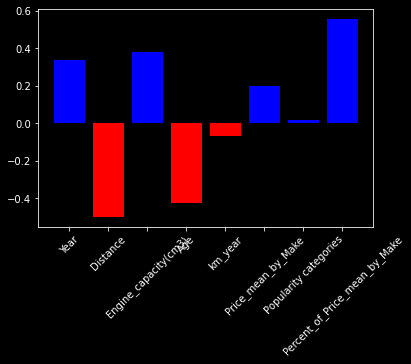

In [313]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

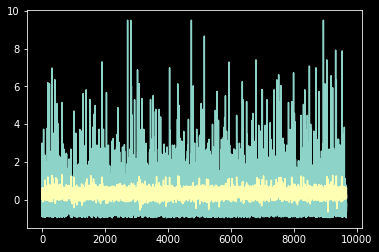

In [314]:
yhat = predict(w, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

In [315]:
np.sum(np.abs(w))

2.4854152928597575

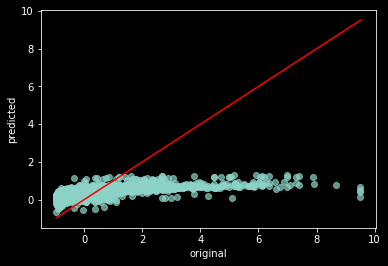

In [316]:
plt.scatter(y_test,yhat,alpha = 0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

Оценим линейную регрессию

MSE

In [317]:
mean_square_error(w, X_test, y_test)

8200.650308554747

MAE

In [318]:
mean_absolute_error(w, X_test, y_test)

6884.621568262015

Коэффициент детерменации

In [319]:
r2_score(w, X_test, y_test)

0.11634947777576987

При использовании стандартизации модель не улучшилась

## **One-hot кодирование**

### **Загрузка данных на Google Drive**

In [330]:
uploaded = files.upload()

Saving cars_moldova_onehot.csv to cars_moldova_onehot.csv


### **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [331]:
df = pd.read_csv('/content/cars_moldova_onehot.csv', delimiter = ',')
df

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Make_ARO,Make_Abarth,Make_Acura,Make_Alfa Romeo,Make_Alta marca,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
0,2011,195000.0,1800.0,1,7750.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2014,135000.0,1500.0,0,8550.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1998,1.0,1400.0,0,2200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2012,110000.0,1500.0,0,6550.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,2006,200000.0,1600.0,0,4100.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37259,2002,225000.0,1800.0,0,4400.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37260,2015,89000.0,1500.0,0,7000.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
37261,2009,225.0,1500.0,0,4500.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
37262,2006,370000.0,2000.0,0,4000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Columns: 939 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: float64(3), int64(936)
memory usage: 267.0 MB


Найдем категориальные и численные столбцы

In [334]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  [] 
 Число столблцов =  0
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission', 'Price(euro)', 'Make_ARO', 'Make_Abarth', 'Make_Acura', 'Make_Alfa Romeo', 'Make_Alta marca', 'Make_Aston Martin', 'Make_Audi', 'Make_BAIC', 'Make_BMW', 'Make_Bentley', 'Make_Brilliance', 'Make_Buick', 'Make_Byd', 'Make_Cadillac', 'Make_Changan', 'Make_Chery', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Citroen', 'Make_Dacia', 'Make_Daewoo', 'Make_Daihatsu', 'Make_Datsun', 'Make_Dodge', 'Make_Faw', 'Make_Ferrari', 'Make_Fiat', 'Make_Ford', 'Make_GAZ', 'Make_GMC', 'Make_Geely', 'Make_Great Wall', 'Make_Groz', 'Make_Haima', 'Make_Haval', 'Make_Honda', 'Make_Hummer', 'Make_Hyundai', 'Make_Infiniti', 'Make_Isuzu', 'Make_Jac', 'Make_Jaguar', 'Make_Jeep', 'Make_KIA', 'Make_Lada', 'Make_Lamborghini', 'Make_Lancia', 'Make_Land Rover', 'Make_Lexus', 'Make_Lifan', 'Make_Lincoln', 'Make_LuAZ', 'Make_Maserati', 'Make_Mazda', 'Make_McLaren', 'Make_Mercedes', 'Make_Mercedes

### **Линейная регрессия**

In [335]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values # x = все параметры кроме Price, y = Price

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Columns: 939 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: float64(3), int64(936)
memory usage: 267.0 MB


,0,1,2,3,4,5,6,7,8,9,...,928,929,930,931,932,933,934,935,936,937
26079,0.867769,0.001870,0.150015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
26080,0.752066,0.002993,0.159516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26081,0.884298,0.002600,0.149715,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26082,0.867769,0.001091,0.138814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26083,0.909091,0.002841,0.250025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


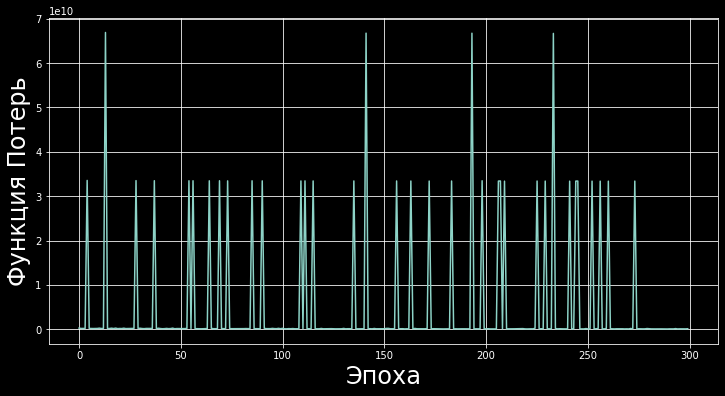

train R2: 0.0027; test R2: 0.1110


In [336]:
regr = LinearRegression(learning_rate=0.001,epochs=300,batch_size=3000)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

посмотрим веса

In [337]:
w, b = regr.get_w_and_b()
plt.figure(figsize=(199,100))
vis_weigths(w, features_names)

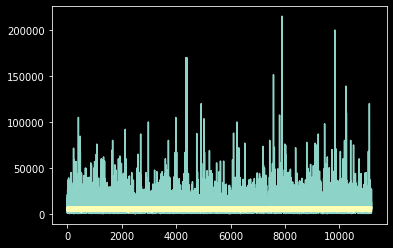

In [338]:
yhat = predict(w, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

In [339]:
np.sum(np.abs(w))

17264.474810612508

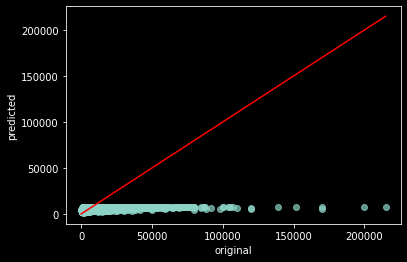

In [340]:
plt.scatter(y_test,yhat,alpha = 0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

Оценим линейную регрессию

MSE

In [341]:
mean_square_error(w, X_test, y_test)

1245262606412.1006

MAE

In [342]:
mean_absolute_error(w, X_test, y_test)

60661531.66255947


Коэффициент детерменации

In [343]:
r2_score(w, X_test, y_test)

-0.03231970624907099

При использовании One-hot  кодирования модель не улучшилась